In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class Bandit:
    def __init__(self, mu, mu_upper_limit):
        # True average of current bandit
        self.mu = mu
        # The upper limit of mean we can think for current bandit.
        # This is part of the Optimistic-Initial-Values algorithm.
        self.mean = mu_upper_limit
        self.N = 1
    def pull(self):
        return np.random.randn() + self.mu
    
    def update(self, x):
        # Update the mean using the new datapoint
        self.N += 1
        aN = 1.0/self.N
        self.mean = (1.0 - aN)*self.mean + aN* x
        
    def get_mean(self):
        return self.mean

In [12]:
def run_MultiBandit_Arm_Optimistic_Values(m1=0.2,m2=0.4,m_upper_limit=10,N_iter=10000):
    def _cumulative_average(data):
        return np.cumsum(data) / (np.arange(len(data))+1)
    # Create a 2-arm bandit array.
    bandits = [Bandit(mu=m1, mu_upper_limit=m_upper_limit), Bandit(mu=m2, mu_upper_limit=m_upper_limit)]
    # To store x
    data = np.empty(N_iter)
    # Run N_iter experiments, using optimistic initial value
    for i in range(N_iter):
        # pick which bandit has the highest mean so far
        which_bandit = np.argmax([b.get_mean() for b in bandits])
        x = bandits[which_bandit].pull()
        bandits[which_bandit].update(x)
        # store x
        data[i] = x
    return _cumulative_average(data)

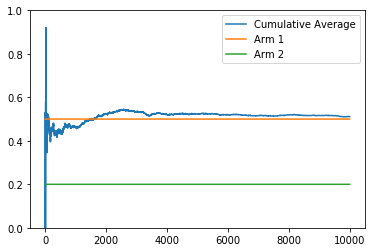

In [17]:
m1 = 0.5
m2 = 0.2
m_upper_limit=5
accum_avg = run_MultiBandit_Arm_Optimistic_Values(m1=m1, m2=m2, m_upper_limit=m_upper_limit, N_iter=10000)
plt.plot(accum_avg, label='Cumulative Average')
plt.plot(np.ones(len(accum_avg))*m1, label='Arm 1')
plt.plot(np.ones(len(accum_avg))*m2, label='Arm 2')
plt.legend()
plt.ylim([0,1])
plt.show()